[생선 분류]
- 데이터셋: fish.csv
- feature(특성): Weight, Length
- target(라벨): Species
- 학습방법: 지도학습 중 분류
- 학습 알고리즘: 최근접이웃 알고리즘

1) 데이터 준비

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data_file='../data/fish.csv'

In [9]:
#행: bream, smelt & 컬럼: Species(0), Weight(1), length(2)
fishdf=pd.read_csv(data_file, usecols=[0,1,2])

In [10]:
mask=(fishdf['Species']=='Bream')|(fishdf['Species']=='Smelt')
twofish=fishdf[mask]
twofish.reset_index(drop=True,inplace=True)
twofish.index

RangeIndex(start=0, stop=49, step=1)

In [11]:
#species 컬럼 수치화: bream 0, smelt 1
new=twofish.loc[:,'Species'].replace({'Bream':0,'Smelt':1})
twofish['code']=new

C:\Users\desktop\AppData\Local\Temp\ipykernel_9752\1368578826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twofish['code']=new


In [12]:
twofish.head(3)

,Species,Weight,Length,code
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0


2) feature-target 분리

In [13]:
features=twofish[['Weight','Length']]
target=twofish['code']

print(f'features: {features.shape}, {features.ndim}D')
print(f'target: {target.shape}, {target.ndim}D')

features: (49, 2), 2D
target: (49,), 1D


3) 데이터셋 준비

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#train:test=8:2 => train_size=0.8 설정 필요 (or test_size=0.2)
#stratify: 분류 타겟의 종류에 대한 비율 고려하기 위해 사용
# target = twofish['code'].astype(str)

x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.2,stratify=target,random_state=10)

In [16]:
print(f'x_train:{x_train.shape},{x_train.ndim}D')
print(f'y_train:{y_train.shape},{y_train.ndim}D')

print(f'x_test:{x_test.shape},{x_test.ndim}D')
print(f'y_test:{y_test.shape},{y_test.ndim}D')

x_train:(39, 2),2D
y_train:(39,),1D
x_test:(10, 2),2D
y_test:(10,),1D


In [17]:
y_train.head()

7     0
43    1
1     0
46    1
31    0
Name: code, dtype: int64

In [18]:
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [19]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

feature 스케일링

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
#스케일러 인스턴스 생성
mmscaler=MinMaxScaler()

In [22]:
#데이터 기반 MinMaxScaler 동작을 위한 학습 진행
mmscaler.fit(x_train)

MinMaxScaler()

In [23]:
mmscaler.min_,mmscaler.data_min_,mmscaler.scale_,mmscaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [30]:
#학습용 데이터 셋 스케일링 => ndarray 타입 반환
x_train_scaled=mmscaler.transform(x_train)
x_train_scaled.shape,x_train_scaled.min(),x_train_scaled.max()

((39, 2), 0.0, 1.0000000000000002)

In [32]:
#테스트용 데이터 셋 스케일링 => ndarray 타입 반환
x_test_scaled=mmscaler.transform(x_test)
x_test_scaled.shape,x_test_scaled.min(),x_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

4) 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행: fit()

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
#인스턴스 생성
model=KNeighborsClassifier()

In [35]:
#학습 진행 w. 학습용 데이터 셋
model.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [37]:
#학습 후 모델 파라미터
model.classes_, model.n_samples_fit_

# model.feature_names_in_ : ERROR (ndarray 타입이라서 컬럼명 X)

(array([0, 1], dtype=int64), 39)

5) 모델 성능 평가
- score()
- 데스트 데이터 셋

In [38]:
model.score(x_test_scaled,y_test)

1.0

6) 예측하기
- 학습/훈련과 테스트에 사용하지 않은 데이터 사용해야 함
- 입력 데이터가 2d여야 함

In [45]:
new_data=pd.DataFrame([[413,27.8]],columns=['Weight','Length'])
new_data

,Weight,Length
0,413,27.8


In [48]:
mmscaler.data_range_,mmscaler.transform(new_data)

(array([993.3,  31.2]), array([[0.40904057, 0.57692308]]))

In [52]:
new_data_scaled=mmscaler.transform(new_data)
new_data_scaled

array([[0.40904057, 0.57692308]])

In [53]:
#임의의 새로운 데이터 예측
model.predict(new_data_scaled)

array([0], dtype=int64)

최근접 k개 데이터 찾기

In [54]:
distance,index=model.kneighbors(new_data_scaled)

In [55]:
distance

array([[0.04209753, 0.06334927, 0.07138647, 0.07421737, 0.07974703]])

In [59]:
neighbors=index.reshape(-1).tolist()
neighbors

[25, 22, 21, 0, 6]

In [62]:
x_train_scaled[neighbors]

array([[0.42615524, 0.61538462],
       [0.35870331, 0.61538462],
       [0.44629014, 0.63782051],
       [0.38588543, 0.6474359 ],
       [0.44629014, 0.6474359 ]])

In [67]:
k_weight=x_train_scaled[neighbors][:,0]
k_length=x_train_scaled[neighbors][:,1]

print(k_weight,k_length,sep='\n')
print(new_data_scaled)

[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]
[[0.40904057 0.57692308]]


In [57]:
twofish.loc[[25,0],'code']

25    0
0     0
Name: code, dtype: int64

In [58]:
twofish.iloc[neighbors]

,Species,Weight,Length,code
25,Bream,725.0,35.0,0
22,Bream,620.0,34.5,0
21,Bream,685.0,34.0,0
0,Bream,242.0,25.4,0
6,Bream,500.0,29.7,0


In [75]:
x_train_scaled[:,0],x_train_scaled[:,1]

(array([3.85885432e-01, 3.12091010e-03, 2.85210913e-01, 5.53709856e-03,
        9.54696466e-01, 1.32890365e-02, 4.46290144e-01, 1.00000000e+00,
        0.00000000e+00, 6.97976442e-01, 4.71458774e-01, 6.47639183e-01,
        4.96627404e-01, 3.02023558e-04, 6.82875264e-01, 3.12091010e-03,
        7.18111346e-01, 3.35548173e-01, 9.24494111e-01, 3.02023558e-03,
        6.74519279e-03, 4.46290144e-01, 3.58703312e-01, 6.07369375e-01,
        6.77841538e-01, 4.26155240e-01, 6.97976442e-01, 3.22158462e-03,
        2.01349039e-03, 4.96627404e-01, 5.72133293e-01, 6.17436827e-01,
        8.05396154e-04, 5.97301923e-01, 9.74831370e-01, 9.19460385e-01,
        4.96627404e-01, 3.35548173e-01, 9.49662740e-01]),
 array([0.6474359 , 0.07051282, 0.52884615, 0.1025641 , 0.91987179,
        0.16666667, 0.6474359 , 0.87179487, 0.        , 0.74358974,
        0.67948718, 0.75961538, 0.69551282, 0.02564103, 0.77564103,
        0.04487179, 0.80769231, 0.53525641, 0.95192308, 0.03846154,
        0.08333333, 0.

시각화

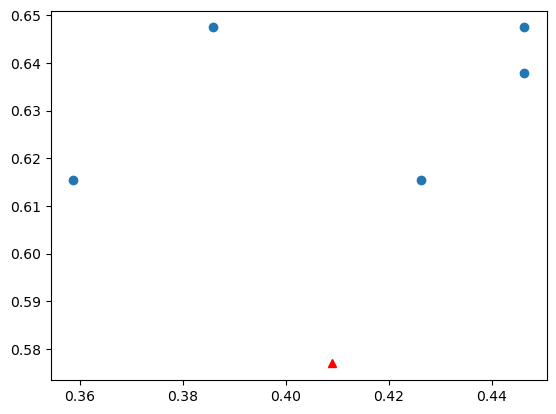

In [70]:
# plt.scatter(twofish.loc[:34,'Weight'],twofish.loc[:34,'Length'])
# plt.scatter(twofish.loc[35:,'Weight'],twofish.loc[35:,'Length'])
plt.plot(new_data_scaled[0,0],new_data_scaled[0,1],'r^')
plt.scatter(k_weight,k_length)
plt.show()

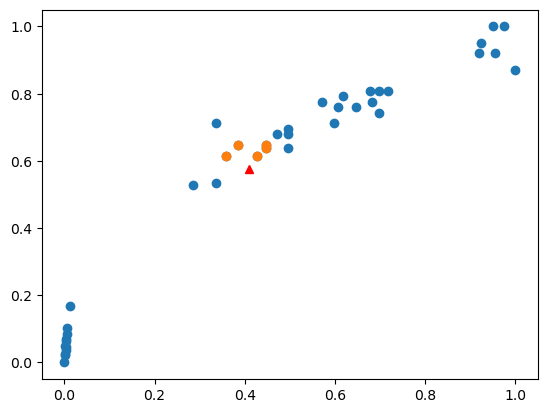

In [74]:
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1])
plt.plot(new_data_scaled[0,0],new_data_scaled[0,1],'r^')
plt.scatter(k_weight,k_length)
plt.show()